<a href="https://colab.research.google.com/github/nibagon/MLforDS/blob/main/Unit1_regression/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
%matplotlib inline
import pylab as plt

data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/ML/Unit1_regression/data.txt", delimiter=",")
data

array([[1896.  ,   12.  ],
       [1900.  ,   11.  ],
       [1904.  ,   11.  ],
       [1906.  ,   11.2 ],
       [1908.  ,   10.8 ],
       [1912.  ,   10.8 ],
       [1920.  ,   10.8 ],
       [1924.  ,   10.6 ],
       [1928.  ,   10.8 ],
       [1932.  ,   10.3 ],
       [1936.  ,   10.3 ],
       [1948.  ,   10.3 ],
       [1952.  ,   10.4 ],
       [1956.  ,   10.5 ],
       [1960.  ,   10.2 ],
       [1964.  ,   10.  ],
       [1968.  ,    9.95],
       [1972.  ,   10.14],
       [1976.  ,   10.06],
       [1980.  ,   10.25],
       [1984.  ,    9.99],
       [1988.  ,    9.92],
       [1992.  ,    9.96],
       [1996.  ,    9.84],
       [2000.  ,    9.87],
       [2004.  ,    9.85],
       [2008.  ,    9.69]])

Text(0, 0.5, 'time (s)')

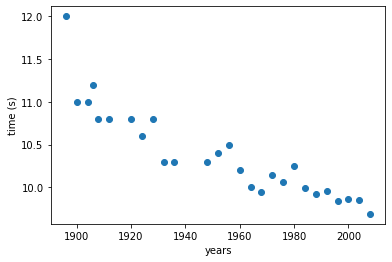

In [24]:
x = data[:,0]
t = data[:,1]
plt.scatter(x,t)
plt.xlabel("years")
plt.ylabel("time (s)")

#fit a straight Line


Text(0, 0.5, 'time (s)')

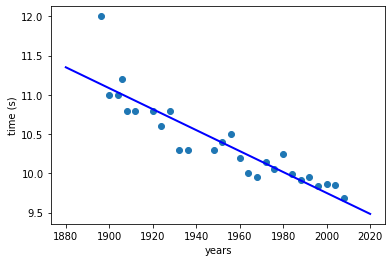

In [25]:
w_0=36.416545559025
w_1=-0.013333

x_test=np.linspace(1880,2020,100)
ftest=w_0+w_1*x_test
plt.plot(x_test,ftest, "b-", linewidth=2)

plt.scatter(x,t)
plt.xlabel("years")
plt.ylabel("time (s)")

#model fitting

Recall that the average loss is $$  L(w_0, w_1) = \frac{1}{N}\sum_{n=1}^N (t_n - w_0 - w_1x_n)^2 $$
$L$ is a function of $w_0$ and $w_1$. All $x_n$ and $t_n$ are given.  

The procedure to find the analytical expression of the optimal parameters is the following:

- Solving $$\frac{\partial L(w_0, w_1)}{\partial w_0} = 0, \quad \frac{\partial L(w_0, w_1)}{\partial w_1} = 0 $$ 
- the average loss is minimised:
$$ w_1 = \frac{\bar{x}\bar{t} - \bar{xt}}{\bar{x}\bar{x} - \bar{x^2}} $$
and
$$ w_0 = \bar{t} - w_1\bar{x} $$
where $\bar{z} = \frac{1}{N}\sum_{n=1}^N z_n$.

In [26]:
from sklearn.linear_model import LinearRegression
#do not repet this one because it will create 4 dimension arrays 
x=x[:,None]
t=t[:,None]

reg=LinearRegression().fit(x,t)

In [17]:
[reg.intercept_,reg.coef_]# y1 and m

[array([36.4164559]), array([[-0.01333089]])]

In [18]:
reg.predict(np.array([[2012]]))

array([[9.59471385]])

Text(0, 0.5, 'time (s)')

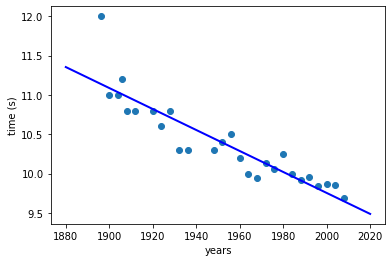

In [28]:
x_test=np.linspace(1880,2020,100)[:,None] #important to add the [:,none]
f_test=reg.predict(x_test)

plt.plot(x_test,f_test, "b-", linewidth=2)

plt.scatter(x,t)
plt.xlabel("years")
plt.ylabel("time (s)")


#add an outlier

Text(0, 0.5, 'time (s)')

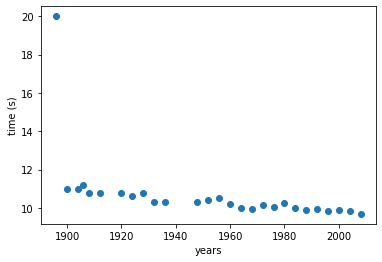

In [19]:
outlier_idx=np.array([0])
t_outlier= t
t_outlier[outlier_idx]=20
plt.scatter(x,t_outlier)
plt.xlabel("years")
plt.ylabel("time (s)")

Text(0, 0.5, 'time (s)')

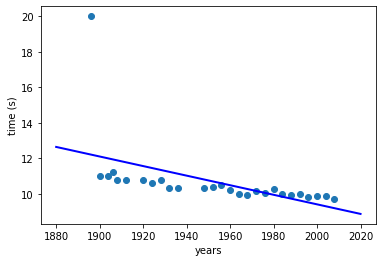

In [29]:
reg=LinearRegression().fit(x,t_outlier)

x_test=np.linspace(1880,2020,100)[:,None] #important to add the [:,none]
f_test=reg.predict(x_test)

plt.plot(x_test,f_test, "b-", linewidth=2)

plt.scatter(x,t_outlier)
plt.xlabel("years")
plt.ylabel("time (s)")

The outlier hurts linear regression so a way of solving it is using polynomial Regression

# Polynomial regression

In [30]:
#function to construct a polynomial matrix
def make_polynomial (x, maxorder):
  X=np.ones_like(x)
  for i in range(1,maxorder+1):
    X=np.hstack((X,x**i))
  return(X)

In [31]:
poly_order=3
poly_X=make_polynomial(x,poly_order)
poly_X

array([[1.00000000e+00, 1.89600000e+03, 3.59481600e+06, 6.81577114e+09],
       [1.00000000e+00, 1.90000000e+03, 3.61000000e+06, 6.85900000e+09],
       [1.00000000e+00, 1.90400000e+03, 3.62521600e+06, 6.90241126e+09],
       [1.00000000e+00, 1.90600000e+03, 3.63283600e+06, 6.92418542e+09],
       [1.00000000e+00, 1.90800000e+03, 3.64046400e+06, 6.94600531e+09],
       [1.00000000e+00, 1.91200000e+03, 3.65574400e+06, 6.98978253e+09],
       [1.00000000e+00, 1.92000000e+03, 3.68640000e+06, 7.07788800e+09],
       [1.00000000e+00, 1.92400000e+03, 3.70177600e+06, 7.12221702e+09],
       [1.00000000e+00, 1.92800000e+03, 3.71718400e+06, 7.16673075e+09],
       [1.00000000e+00, 1.93200000e+03, 3.73262400e+06, 7.21142957e+09],
       [1.00000000e+00, 1.93600000e+03, 3.74809600e+06, 7.25631386e+09],
       [1.00000000e+00, 1.94800000e+03, 3.79470400e+06, 7.39208339e+09],
       [1.00000000e+00, 1.95200000e+03, 3.81030400e+06, 7.43771341e+09],
       [1.00000000e+00, 1.95600000e+03, 3.82593600e

In [ ]:
poly_reg=LinearRegression(poly_X,t)#the polynomial is our X_train
